# TSF task 1 (Prediction using supervised learning )

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# dAta importing
data_Url= "http://bit.ly/w-data"
df=pd.read_csv(data_Url)

In [5]:
df.head() # data containg two coulmns of hours and scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.shape # No. of rows and columns

(25, 2)

In [10]:
df.isnull().sum() # none of two columns have null entries

Hours     0
Scores    0
dtype: int64

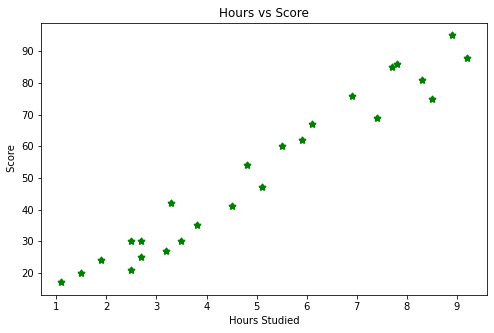

In [19]:
#data Visualisation 
plt.figure(figsize=(8,5))
plt.scatter(df.Hours,df.Scores,
            linewidths = 2,
            marker ="*",
            edgecolor ="green")
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel(' Score')  
plt.show()

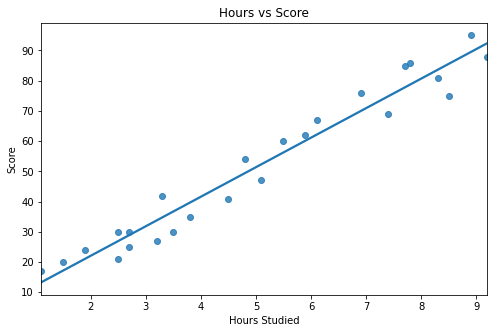

In [27]:
#Regression plot 
plt.figure(figsize=(8,5))
sns.regplot(x = df.Hours,
            y = df.Scores, 
            ci = None,
            data = df)
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

In [29]:
#Data preparation for train the model
X = df[['Hours']]
y = df['Scores']

In [86]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [87]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [35]:
#prepare data for model deployment from sklearn 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression


regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [36]:
#printing the slope and y -intercept values for regression line
print("Linear slope coefficient(m)",regressor.coef_)
print("Linear y intercept coefficient (b)",regressor.intercept_)

Linear slope coefficient(m) [9.78856669]
Linear y intercept coefficient (b) 2.370815382341881


In [43]:
# predict values from model
y_predict=regressor.predict(X_test)

In [50]:
# checking the predicted values how close to actual values
print(y_predict)
print(y_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df1

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]
5     20
2     27
19    69
16    30
11    62
22    35
17    24
24    86
Name: Scores, dtype: int64


,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


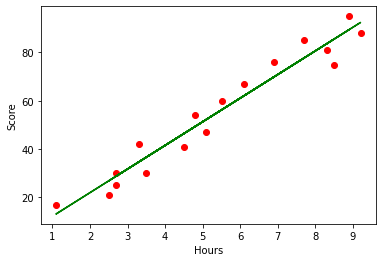

In [83]:
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,regressor.predict(X_train),color="green") ### x_train vs predict y_train=(regressor.predict(x_train))
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [68]:
#testing the data
input_hour=[[9.25]]
output_study_score=regressor.predict(input_hour)
print("No of Hours = {}".format(input_hour[0][0]))
print("predicted percentage score = {}".format(output_study_score[0]))

No of Hours = 9.25
predicted percentage score = 92.91505723477056


# Model Score prediction
As per situation asked if a student studies 9.25 hours in a day how much it will score? From the model we have predicted a score for the student who studies 9.25 hours is 92.91505723477056%.

In [80]:
# Model evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

In [81]:
RMSE=float(format(np.sqrt(mean_squared_error(y_test,y_predict)), ".4f"))
MSE=mean_squared_error(y_test,y_predict)
MAE=mean_absolute_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
adjust_r2=1-(1-r2)*(n-1)/(n-k-1)
MAPE=np.mean(np.abs((y_test-y_predict)/y_test))*100

In [82]:
print("RMSE value :", RMSE , "\nMSE : ", MSE , "\nMAE : ", MAE, "\nr2 : ",r2, "\nadjust_r2 :",adjust_r2,"\nMAPE :",MAPE)

RMSE value : 4.7922 
MSE :  22.96509721270043 
MAE :  4.419727808027652 
r2 :  0.9568211104435257 
adjust_r2 : 0.9496246288507799 
MAPE : 11.9542830614004
